In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Exploramos los datos
 Exploramos los datos para reconocer su estructura y tamaños necesarios de las x, w1,b1,w2,b2 e y

In [96]:
df_test= pd.read_excel('Real estate valuation data set.xlsx',  nrows=10)

x = df_test.iloc[:, 1:7].values.transpose().tolist()


for line in x:
    for i in range(len(line)):
        line[i] = (line[i] -min(line))/(max(line)-min(line))


x = np.array(x)
y = df_test.iloc[:, 7].values.tolist()


print(x)
print(y)


[[2012.9166667, 2012.9166667, 2013.5833333, 2013.5, 2012.8333333, 2012.6666667, 2012.6666667, 2013.4166667, 2013.5, 2013.4166667], [32.0, 19.5, 13.3, 13.3, 5.0, 7.1, 34.5, 20.3, 31.7, 17.9], [84.87882, 306.5947, 561.9845, 561.9845, 390.5684, 2175.03, 623.4731, 287.6025, 5512.038, 1783.18], [10.0, 9.0, 5.0, 5.0, 5.0, 3.0, 7.0, 6.0, 1.0, 3.0], [24.98298, 24.98034, 24.98746, 24.98746, 24.97937, 24.96305, 24.97933, 24.98042, 24.95095, 24.96731], [121.54024, 121.53951, 121.54391, 121.54391, 121.54245, 121.51254, 121.53642, 121.54228, 121.48458, 121.51486]]
[[0.27272729256195555, 0.9996688704673731, 1.0, 1.0, 0.9996688567112925, 0.9995860709263692, 0.9995860709263692, 0.9999586071075384, 1.0, 1.0], [0.9152542372881356, 0.5533686601059804, 0.37549031632232094, 0.37874565242060276, 0.13551871445319721, 0.20266510725642645, 1.0, 0.6388345527724546, 1.0, 1.0], [0.0, 0.05562274788381358, 0.10195584645824286, 0.10195584645824286, 0.07085734895151304, 0.39459633623715956, 0.11311117593891772, 0.052

### Declaramos las funciones auxiliares

In [98]:
def forward(W1, W2, b1, b2, x):
   
    f1 = np.dot(W1, x) + b1
    sigma = 1 / (1 + np.exp(-f1))
    f = np.dot(W2, sigma) + b2

    return f

def funcion_objetivo(x, y, W1, W2, b1, b2):


    loss = 0.5 * (np.power(forward(W1, W2, b1, b2, x) - y, 2)) 
    return loss

In [119]:
#Calculo del gradiente numerico

def funcion_objetivo(x, y, W1, W2, b1, b2):
    loss = 0.5 * (np.power(forward(W1, W2, b1, b2, x) - y, 2)) 
    return loss

def numerical_gradient(W1, W2, b1, b2, x, y, epsilon):
    #Tenemos que calcular el gradiente de la función objetivo en un punto, que equivale a computar las siguientes derivadas parciales respecto a cada elemento de las matrices W y los vectores b.

    der_W1 = (funcion_objetivo(x, y, W1 + epsilon, W2, b1, b2) - funcion_objetivo(x, y, W1 - epsilon, W2, b1, b2)) / (2 * epsilon)
    der_W2 = (funcion_objetivo(x, y, W1, W2 + epsilon, b1, b2) - funcion_objetivo(x, y, W1, W2 - epsilon, b1, b2)) / (2 * epsilon)
    der_b1 = (funcion_objetivo(x, y, W1, W2, b1 + epsilon, b2) - funcion_objetivo(x, y, W1, W2, b1 - epsilon, b2)) / (2 * epsilon)
    der_b2 = (funcion_objetivo(x, y, W1, W2, b1, b2 + epsilon) - funcion_objetivo(x, y, W1, W2, b1, b2 - epsilon)) / (2 * epsilon)  


    return der_W1, der_W2, der_b1, der_b2

In [132]:
#funcion fit y loop de entrenamiento
#Implementar el método fit() que realiza el ciclo de entrenamiento de la red. En cada iteración, se calcula el valor del gradiente promedio para todas las muestras del dataset y se actualizan los parámetros de la función utilizando esta dirección.

def fit(x, y, learning_rate=0.001, epochs=1000, eps=1e-6):
    #Inicializacion de pesos
    W1 = np.random.random((5,6))
    b1 = np.random.random((5,1))
    W2 = np.random.random((1,5))
    b2 = np.random.random((1,1))

    loss_accum = []
    for iteracion in range(epochs):
        der_W1, der_W2, der_b1, der_b2 = numerical_gradient(W1, W2, b1, b2, x, y, eps)
        #Una vez que calculamos todos estos gradientes, podemos usarlos para actualizar la red. Hacemos esto restando una pequeña cantidad de cada derivada parcial al parámetro correspondiente. Esta cantidad es controlada por un parámetro llamado learning rate o tasa de aprendizaje.
        #Es decir, para nuestro espacio de parámetros θ, calculamos:
        W1 = W1 - learning_rate *np.mean(der_W1)
        W2 = W2 - learning_rate * np.mean(der_W2)
        b1 = b1 - learning_rate *np.mean( der_b1)
        b2 = b2 - learning_rate *np.mean( der_b2)
        
        loss_accum.append(np.mean(funcion_objetivo(x, y, W1, W2, b1, b2)))

    return loss_accum, W1, W2, b1, b2

In [101]:
def predict(x,W1, W2, b1, b2):
        y = forward(W1, W2, b1, b2, x)
        return y

[101.9806935383449, 101.95612285726735, 101.93166387211328, 101.90731603221538, 101.88307878964717, 101.85895159920956, 101.83493391841722, 101.81102520748523, 101.78722492931554, 101.7635325494839]

maximo:  679.2095886637106
minimo:  101.7635325494839



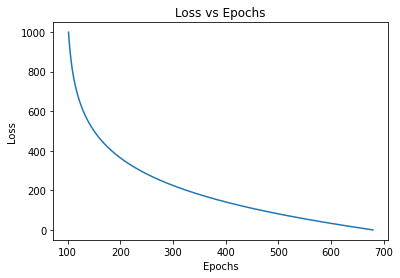

In [163]:
df_test= pd.read_excel('Real estate valuation data set.xlsx',  nrows=10000)

x = df_test.iloc[:, 1:7].values.transpose().tolist()
mean = lambda x: sum(x) / len(x)
std = lambda x: (sum([(i - mean(x))**2 for i in x]) / len(x))**0.5

for line in x:
    for i in range(len(line)):

        line[i] = (line[i] -mean(line))/(std(line))



x = np.array(x)

y = df_test.iloc[:, 7].values.tolist()


loss, W1, W2, b1, b2 = fit(x, y, learning_rate=0.0001, epochs=1000,eps=0.01)
print(loss[-10:])
print()
print('maximo: ', max(loss))
print('minimo: ', min(loss))
print()

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.plot(loss,range(len(loss)))

## Pruebo predecir con los datos de entrenamiento los datos de prueba

### Entrenamos la red neuronal

In [ ]:
df_train= pd.read_excel('Real estate valuation data set.xlsx',  nrows=315)

x = df_train.iloc[:, 1:7].values.transpose().tolist()
mean = lambda x: sum(x) / len(x)
std = lambda x: (sum([(i - mean(x))**2 for i in x]) / len(x))**0.5
for line in x:
    for i in range(len(line)):
        line[i] = (line[i] -mean(line))/(std(line))
x = np.array(x)
y = df_train.iloc[:, 7].values.tolist()
loss, W1, W2, b1, b2 = fit(x, y, learning_rate=0.0001, epochs=1000,eps=0.01)

### Evaluamos

In [ ]:
df_prueba = pd.read_excel('Real estate valuation data set.xlsx',  nrows=414, skiprows=315)
x = df_prueba.iloc[:, 1:7].values.transpose().tolist()
mean = lambda x: sum(x) / len(x)
std = lambda x: (sum([(i - mean(x))**2 for i in x]) / len(x))**0.5
for line in x:
    for i in range(len(line)):
        line[i] = (line[i] -mean(line))/(std(line))
x = np.array(x)
y =np.array( df_prueba.iloc[:, 7].values.tolist())

pred = predict(x,W1, W2, b1, b2)
print(np.mean(y-pred))

como vemos la diferencia promedio es muy baja, por lo que podemos decir que la red neuronal aprendió a predecir los datos de prueba

## Buscamos los hipérparametros óptimos para el modelo de regresión
Realizamos un muestreo de parametros y comparamos sus loss values para encontrar los mejores parametros para el modelo de regresión. Guardamos los resultados en un archivo csv.

### Funcion que itera los hiperparametros

In [137]:
def train_model(eps_range, learning_rate_range, epochs_range,x, y):
    training_list = []
    for eps in range(eps_range[0], eps_range[1]):
        for learning_rate in range(learning_rate_range[0], learning_rate_range[1]):
            for epochs in range(epochs_range[0], epochs_range[1]):
                loss, W1, W2, b1, b2 = fit(x, y, learning_rate=1*(10**-learning_rate), epochs=10**epochs,eps=10**-eps)
                training_list.append([loss[-1], epochs, learning_rate, eps])
    return training_list


### Ejecuto la funcion con distintos rangos de hiperparametros

In [157]:
df_test= pd.read_excel('Real estate valuation data set.xlsx',  nrows=10000)


x = df_test.iloc[:, 1:7].values.transpose().tolist()
mean = lambda x: sum(x) / len(x)
std = lambda x: (sum([(i - mean(x))**2 for i in x]) / len(x))**0.5

for line in x:
    for i in range(len(line)):

        line[i] = (line[i] -mean(line))/(std(line))

x = np.array(x)
y = df_test.iloc[:, 7].values.tolist()


training_list = train_model([2, 6], [2, 6], [2, 5], x, y)
losses = [x[0] for x in training_list]

pd.DataFrame(training_list).to_csv('training.csv',sep=';', index=False, header=['loss', 'epochs', 'learning_rate', 'eps'])

In [162]:
csv = pd.read_csv('training.csv', sep=';')
csv = csv.sort_values(by=['loss'])
print(csv[:10])

         loss  epochs  learning_rate      eps
17  78.238050   10000          0.001  0.00100
5   91.587170   10000          0.001  0.01000
14  92.351984   10000          0.010  0.00100
38  92.354608   10000          0.010  0.00001
26  92.354637   10000          0.010  0.00010
41  92.441461   10000          0.001  0.00001
25  92.442266    1000          0.010  0.00010
1   92.442285    1000          0.010  0.01000
29  92.442779   10000          0.001  0.00010
37  92.442789    1000          0.010  0.00001


### Conclusiones
En los hiperparametros podemos observar que la gran mayoria de las buenas aproximacion tienen un learning rate de 0.001 y un batch size de 10000. Por lo que podemos concluir que estos son los mejores hiperparametros para el modelo de regresion. el epsilon para learning_rates mas grandes es mas chico, probablemente porque entre ellos si regulan para llegar a un ratio optimo. Respecto al batch, si bien para mayor cantidad de datos la estimacion mejora, sobre todo para learning rates muy bajos, no parece ser muy significativa la diferencia a partir de 1000 datos en adelante. 
Por lo que podriamos concluir que el learning rate es el hiperparametro mas importante para el modelo de regresion, o que por lo menos regula a los otros dos.

Entonces, elegimos como hiperparametros para el modelo de regresion: learning rate = 0.001 y epochs = 10000 y epsilon = 0.001